In [1]:
import numpy as np
import scipy
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.multitest import multipletests
import math
import warnings
warnings.filterwarnings("ignore")

# Homework 2
## Hypothesis testing

Each task is worth 5 points, 20 points in total. Additionally, some tasks allow you to get a bonus point, that **can not** increase your total score for the homework beyond the maximum, but can compensate for some occasionally lost points.

### Task 1: multiple comparisons

A randomized, double-blind experiment was conducted to assess the
effectiveness of several drugs for reducing postoperative nausea. The
data are as follows:

In [2]:
df1 = pd.DataFrame({'Drug': ['Placebo', 'Chlorpromazine', 'Dimenhydrinate', 'Pentobarbital (100 mg)', 'Pentobarbital (150 mg)'],
                    'Number of Patients': [80, 75, 85, 67, 85],
    
                    'Incidence of Nausea': [45, 26, 52, 35, 37]})
df1

,Drug,Number of Patients,Incidence of Nausea
0,Placebo,80,45
1,Chlorpromazine,75,26
2,Dimenhydrinate,85,52
3,Pentobarbital (100 mg),67,35
4,Pentobarbital (150 mg),85,37


1. Test each drug versus the placebo at the 5% level. Also, report
the estimated odds–ratios. Summarize your findings. (2 points)
2. Use the Bonferroni and the FDR method to adjust for multiple
testing. (Beecher (1959)) (3 points)
3. Reproduce plot similar to Figure 10.6 from the book, displaying observed $p$-values and different thresholds used (1 bonus point)

*Hint*. Use simple $H_0$: "$p = p_0$".

__1.1__

Our sample consists of patients that can be be sick or healthy. Hence, we should use Bernoulli distribution to check our hypothesis. 

$p_0$ - chance of nausea after taking the placebo

$p$ - chance of nausea after taking drug

 $H_0$: $p = p_0$ - placebo and drug has the same utility level.
 
 $H_1$: $p < p_0$ - drug better treats nausea then placebo.

$p_0 = \frac{45}{80} = 0.5625$

In [3]:
#Chlorpromazine vs Placebo
Chlorpromazine = scipy.stats.binom_test(26, 75, 0.5625, alternative = 'less')

#Dimenhydrinate vs Placebo
Dimenhydrinate = scipy.stats.binom_test(52, 85, 0.5625, alternative = 'less')

#Pentobarbital (100 mg) vs Placebo
Pentobarbital_100 = scipy.stats.binom_test(35, 67, 0.5625, alternative = 'less')

#Pentobarbital (50 mg) vs Placebo
Pentobarbital_50 = scipy.stats.binom_test(37, 85, 0.5625, alternative = 'less')

drugs = [Chlorpromazine, Dimenhydrinate, Pentobarbital_100, Pentobarbital_50]
name = ['Chlorpromazine', 'Dimenhydrinate', 'Pentobarbital_100', 'Pentobarbital_50']
print('Findings:')
for drug, n in zip(drugs, name):
    if drug<0.05:
        print(f"{n} works better then placebo, p_value = ", round(drug,4))
    else:
        print(f'Placebo and {n} have the same effect, p_value = ', round(drug,4))

Findings:
Chlorpromazine works better then placebo, p_value =  0.0001
Placebo and Dimenhydrinate have the same effect, p_value =  0.8474
Placebo and Pentobarbital_100 have the same effect, p_value =  0.2939
Pentobarbital_50 works better then placebo, p_value =  0.0124


In [4]:
#odds-ratios

df1['p'] = df1['Incidence of Nausea']/df1['Number of Patients']
df1['odds'] = df1['p']/(1-df1['p'])
df1['odds-ratios'] = df1['odds']/df1['odds'][0]
df1

,Drug,Number of Patients,Incidence of Nausea,p,odds,odds-ratios
0,Placebo,80,45,0.562500,1.285714,1.000000
1,Chlorpromazine,75,26,0.346667,0.530612,0.412698
2,Dimenhydrinate,85,52,0.611765,1.575758,1.225589
3,Pentobarbital (100 mg),67,35,0.522388,1.093750,0.850694
4,Pentobarbital (150 mg),85,37,0.435294,0.770833,0.599537


As it can be seen, if we replace Placebo with Dimenhydrinate the odds of nausea will increase (due to the fact that odds-ratio is greater then 1). In other cases if we replace the Placebo with one of the drugs, the odds of nausea will decrease. The treatment is provided by Chlorpromazine.

This findings are equal to the one presented earlier.

__1.2__

In [5]:
for method in ["bonferroni", "fdr_bh"]:
    
    reject, pvals, _, _ = multipletests(drugs, method=method, returnsorted=True)
    print(f"Method {method:10s}: reject={reject}\nwith p-values = {pvals}")

Method bonferroni: reject=[ True  True False False]
with p-values = [5.40966839e-04 4.94970536e-02 1.00000000e+00 1.00000000e+00]
Method fdr_bh    : reject=[ True  True False False]
with p-values = [5.40966839e-04 2.47485268e-02 3.91924489e-01 8.47363237e-01]


As it can be seen the results are the same as in previous subproblem (we can state that at the significance level of 5% Chlorpromazine and Pentobarbital (150 mg) work better then the Placebo).

__1.3__

In [6]:
sorted(drugs)[1]

0.012374263398148988

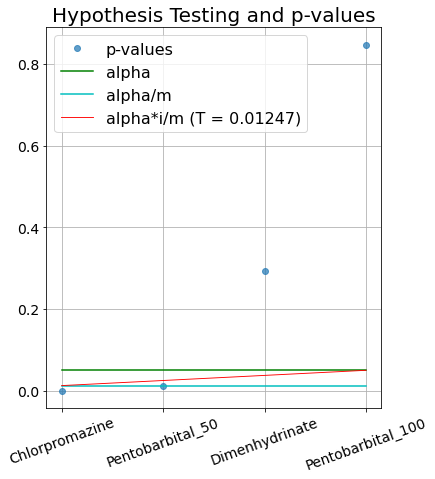

In [7]:
alpha = 0.05
m = 4

x = ['Chlorpromazine', 'Pentobarbital_50', 'Dimenhydrinate', 'Pentobarbital_100']

plt.figure(figsize=(6,7))
plt.title('Hypothesis Testing and p-values', fontsize = 20)
plt.plot(x, sorted(drugs), 'o', label = 'p-values', alpha = 0.7)
plt.plot(x,[alpha]*4, c = 'g', label = 'alpha')
plt.plot(x,[alpha/m]*4, c = 'c', label = 'alpha/m')
plt.plot(x, [alpha/m, 2*alpha/m, 3*alpha/m, 4*alpha/m],linewidth = 0.9, c = 'r', label = 'alpha*i/m (T = 0.01247)')
plt.legend(fontsize = 16)
plt.grid(True)
plt.yticks(fontsize = 14)
plt.xticks(rotation=20, fontsize = 14)
plt.show()

### Task 2: permutation test

For this task we will use the famous Iris dataset, originaly studied by R.A. Fisher himself.

In [8]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We will select two species: *setosa* and *virginica* and study the sepal length.

In [9]:
X = iris[iris.species == 'setosa']['sepal_width'].values
Y = iris[iris.species == 'virginica']['sepal_width'].values

Test the hypothesis $H_0$: "quantiles of level 0.2 of both flowers are equal" vs $H_1$: "quantile of level 0.2 (20 percentile, lower 20%) of the sepal width of *setosa* flowers is  larger than that of *virginica* flowers". Use permutation test, approximate the full permutation distribution with 10,000 samples. (5 points)


$H_0: q_{0.2}(setosa) =q_{0.2}(virginica)$

$H_1: q_{0.2}(setosa) > q_{0.2}(virginica)$

In [10]:
def permutation_test(func, sample1, sample2, nruns):
    m = len(sample1)
    n = len(sample2)
    t_obs = func(sample1, sample2)
    sample_joint = np.r_[sample1, sample2]
    counter = 0.
    for r in range(nruns):
        sample_joint = np.random.permutation(sample_joint)
        t = func(sample_joint[:m], sample_joint[m:])
        counter += t > t_obs
    
    return counter / nruns

T = lambda sample1, sample2: np.quantile(sample1, 0.2) - np.quantile(sample2,0.2)
B = 10000

print('p_value = ',permutation_test(T, X, Y, B))

p_value =  0.0


Therefore, we reject the $H_0$ at any significance level. And can state that quantile of level 0.2 of the sepal width of *setosa* flowers is  larger than that of *virginica* flowers.

### Task 3: computational approach to hypothesis testing

Recommended reading: http://allendowney.blogspot.com/2016/06/there-is-still-only-one-test.html

Consider the following dataset (service hours between failures of the air-conditioning equipment in a Boeing 720 jet aircraft , Proschan, 1963):

In [11]:
Y = np.array([3, 5, 7, 18, 43, 85, 91, 98, 100, 130, 230, 487])

This sample was sorted for easier presentation.

1. Compute an estimate of the median time between failures (1 point)
2. Consider the null hypothesis $H_0$ to be: "median time between failures is one week" (1 point)
3. What distribution will you choose for this kind of data under $H_0$? (1 point)
4. Choose a statistic to measure the deviation from $H_0$ (effect size) (1 point)
5. Check whether you can reject $H_0$ at significance level 5% and calculate the corresponding approximate $p$-value. Use 10,000 simulations for your experiment (1 point)
6. Plot histogram of simulated effect sizes and mark the observed effect size (1 bouns point)

__3.1__

In [12]:
median = np.median(Y)
print(median)

88.0


__3.2__

$H_0: median = m_0 = 168$ hours

$H_1: median \neq m_0$

(Computations are provided in __3.5__)

__3.3__  According to the Theorem (23.35 Theorem from Wasserman):

If $y_i$ are i.i.d. random variables such that $y_i$ are sojourn times (times between failures). Then their distribution is exponential. Density function:

$$f(y)=\lambda e^{-\lambda y}, \quad y \geq 0, \quad \frac{ln(2)}{\lambda} = median$$

Therefoer, I would choose exponential distribution. 

__3.4__

Statistic to measure the deviation from $H_0$: $|median(sample) - m_0|$

__3.5__

In [13]:
def Hypothesis_test(func, sample, nruns):
    n = len(sample)
    t_obs = func(sample)
    median = np.median(sample)
    
    eff_size = []
    counter = 0.
    for r in range(nruns):
        sample_new = np.random.exponential(scale = median/math.log(2), size = n)
        t = func(sample_new)
        eff_size.append(t)
        counter += t > t_obs
    
    return counter / nruns, eff_size

T = lambda sample: np.abs(np.median(sample) - 168)
N = 10000

print('p_value = ',Hypothesis_test(T, Y, N)[0])

p_value =  0.4916


__Conclusion:__ as it can be seen, obtained p-value is larger then 0.05. Therefore, we cannot reject $H_0$ at this significance level.

__3.6__

In [14]:
eff_size = Hypothesis_test(T, Y, N)[1]

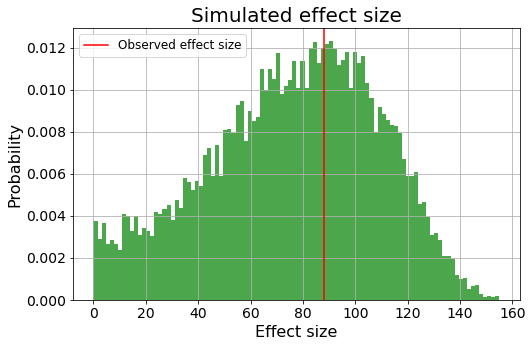

In [15]:
plt.figure(figsize=(8,5))
plt.title('Simulated effect size', fontsize = 20)
plt.hist(eff_size, 100, density=True, facecolor='g', alpha=0.7)
plt.axvline(median, color = 'r', label = 'Observed effect size')
plt.xlabel('Effect size', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.legend(fontsize = 12)
plt.grid(True)
plt.show()

### Task 4: power analysis

In 1861, 10 essays appeared in the New Orleans Daily Crescent. They
were signed “Quintus Curtius Snodgrass” and some people suspected
they were actually written by Mark Twain. To investigate this, we will
consider the proportion of three letter words found in an author’s work.
From eight Twain essays we have:

In [16]:
X = np.array([.225, .262, .217, .240, .230, .229, .235, .217])

From 10 Snodgrass essays we have:

In [17]:
Y = np.array([.209, .205, .196, .210, .202, .207, .224, .223, .220, .201])

1. Perform a Wald test for equality of the means. Use the nonparametric plug-in estimator. Report the p-value and a 95% confidence
interval for the difference of means. What do you conclude? (1.5 points)
2. Now use a permutation test to avoid the use of large sample methods.
What is your conclusion? (Brinegar (1963)) (1.5 points)
3. Assume that samples do indeed come from different populations. Additionally, observed sample means and variaces for the two samples are equal to the true values for the respective population. Estimate the power of the two tests above under two model distributions for the data: Normal and [Beta](https://en.wikipedia.org/wiki/Beta_distribution) (2 points)

__4.1__ 

Wald test:

$H_{0}: \overline X - \overline Y = 0$



$H_{1}: \overline X-\overline Y \neq 0$

We reject $H_{0}$ when $|\frac{\overline X - \overline Y}{\widehat{\mathrm{se}}}|>z_{\alpha / 2}$, where
$ z_{\alpha / 2} = 1.96, \widehat{\mathrm{se}} = \sqrt{\frac{\sigma_{\overline X}^{2}}{n}+\frac{\sigma_{\overline Y}^{2}}{m}}$.

In [18]:
def Wald_test(X,Y):
    X = 1.0 * np.array(X)
    Y = 1.0 * np.array(Y)
    diff_mean = np.abs(np.mean(X) - np.mean(Y))
    s1 = np.std(X)
    s2 = np.std(Y)
    n = len(X)
    m = len(Y)
    se = math.sqrt(s1**2/n + s2**2/m)
    z = scipy.stats.t.ppf(1-0.025, 999)
    W = np.abs(diff_mean/se)
    if W > z:
        return W
    else:
        return W

In [19]:
Wald_test(X,Y)

3.9446199162650353

__Conclusion:__ According to the Wald test we cannot accept H_0 because obtained value is larger then 1.96.

95% confidence interval for the difference of means:

In [20]:
def confidence_interval(data1, data2, confidence=0.95):
    data1 = 1.0 * np.array(data1)
    data2 = 1.0 * np.array(data2)
    n = len(data1)
    m = len(data2)
    diff_mean = np.abs(np.mean(data1) - np.mean(data2))
    s1 = np.std(data1)
    s2 = np.std(data2)
    s = math.sqrt((1/n+1/m)*(((n-1)*s1**2 + (m-1)*s2**2)/(n+m-1)))
    t = scipy.stats.t.ppf((1 + confidence) / 2., n + m - 2)
    h = s * t
    return round(diff_mean,4), (round(diff_mean-h,4), round(diff_mean+h,4))

In [21]:
confidence_interval(X, Y)[1]

(0.0111, 0.0332)

In [22]:
#difference of means
confidence_interval(X, Y)[0]

0.0222

__Conclusion:__ As it can be seen the confidence interval does not include 0, therefore, we can state that the mean values of these two distributions are not equal (we cannot accept null hypothesis). 

__4.2__

In [23]:
def permutation_test(sample1, sample2, nruns):
    m = len(sample1)
    n = len(sample2)
    t_obs = np.abs(np.mean(sample1) -  np.mean(sample2))
    sample_joint = np.r_[sample1, sample2]
    counter = 0.
    for r in range(nruns):
        sample_joint = np.random.permutation(sample_joint)
        t = np.abs(np.mean(sample_joint[:m]) -  np.mean(sample_joint[m:]))
        counter += t > t_obs
    
    return counter / nruns

B = 10000

print('p_value = ',permutation_test(X, Y, B))

p_value =  0.0004


__Conclusion:__ Let the significance level be equal to 5%, then according to the permutation test we reject $H_0$ because p-value is less then 0.05.

__4.3__

In [24]:
def power_test(X, Y, distr, N, alpha = 0.05):
    
    #parameters for normal distribution
    m_0 , std_0 = np.mean(X), np.std(X)
    m_1 , std_1 = np.mean(Y), np.std(Y)
    
    #parameters for beta distribution
    a_0 = (m_0**2 - m_0*std_0**2 - m_0**3)/std_0**2
    a_1 = (m_1**2 - m_1*std_1**2 - m_1**3)/std_1**2
    
    b_0 = (m_0 - std_0**2 - m_0**2)*(1 - m_0)/std_0**2
    b_1 = (m_1 - std_1**2 - m_1**2)*(1 - m_1)/std_1**2
    
    wald = 0
    perm = 0
    
    for i in range(N):
        if distr == 'norm':
            x = np.random.normal(loc=m_0, scale=std_0, size=len(X))
            y = np.random.normal(loc=m_1, scale=std_1, size=len(Y))
            
        if distr == 'beta':
            x = scipy.stats.beta.rvs(a = a_0, b = b_0, size=len(X))
            y = scipy.stats.beta.rvs(a = a_1, b = b_1, size=len(Y))
            
        if Wald_test(x,y) > 1.96:
            wald += 1
        
        if permutation_test(x, y, 10000) < alpha:
            perm += 1
        
    return wald/N, perm/N        

In [25]:
power_wald, power_perm = power_test(X, Y, 'norm',  N = 500, alpha = 0.05)
print(f'For normal distribution the power of Wald test is equal to {power_wald}, the power of permutation test is equal to {power_perm}.')

For normal distribution the power of Wald test is equal to 0.976, the power of permutation test is equal to 0.968.


In [26]:
power_wald1, power_perm1 = power_test(X, Y, 'beta',  N = 500, alpha = 0.05)
print(f'For beta distribution the power of Wald test is equal to {power_wald1}, the power of permutation test is equal to {power_perm1}.')

For beta distribution the power of Wald test is equal to 0.978, the power of permutation test is equal to 0.968.
